In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [43]:
import os

In [44]:
#at above we import libraries

# Reading the dataset

In [45]:
os.getcwd()

'C:\\Users\\OM\\CODESOFT\\Task2'

In [46]:
os.chdir("C:\\Users\\OM\\CODESOFT\\Task2")

In [47]:
#this is iris dataset 
df = pd.read_csv("IRIS1.csv")

# EXPLORATORY DATA ANALYSIS

In [48]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df.shape

(150, 5)

In [50]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [52]:
df.ndim

2

In [53]:
df.size

750

In [54]:
#here not nullvar 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [55]:
df['sepal_length'].value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64

In [56]:
df['petal_width'].value_counts()

0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal_width, dtype: int64

<Axes: xlabel='petal_width', ylabel='count'>

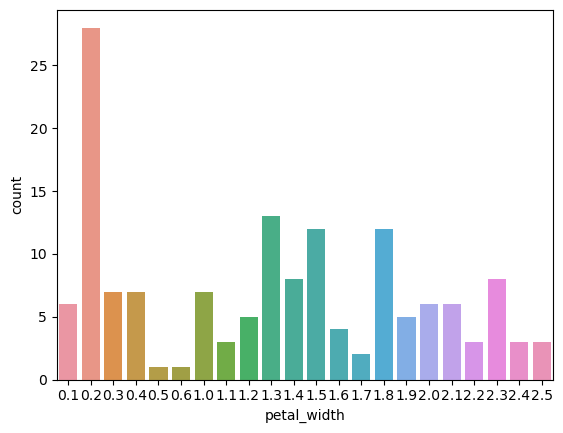

In [57]:
sns.countplot(x = 'petal_width', data = df)

<Axes: ylabel='Frequency'>

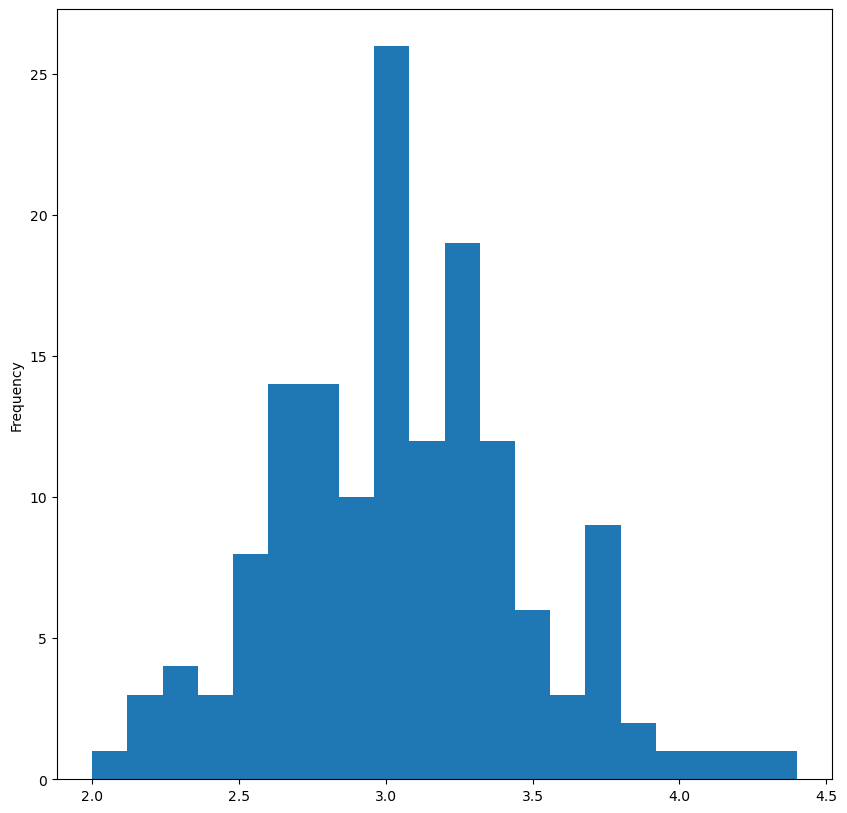

In [58]:
df["sepal_width"].plot.hist(bins = 20 , figsize=(10,10))

<Axes: ylabel='Frequency'>

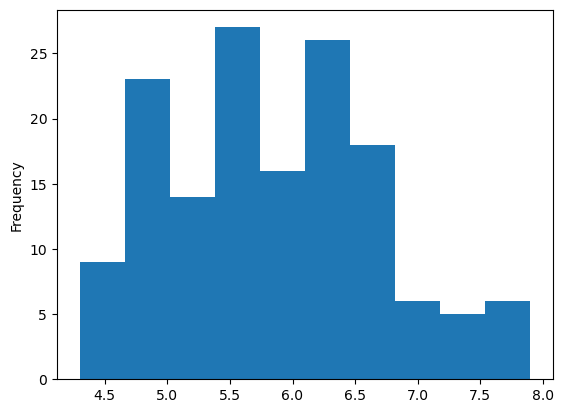

In [59]:
df['sepal_length'].plot.hist()

<Axes: xlabel='petal_length', ylabel='count'>

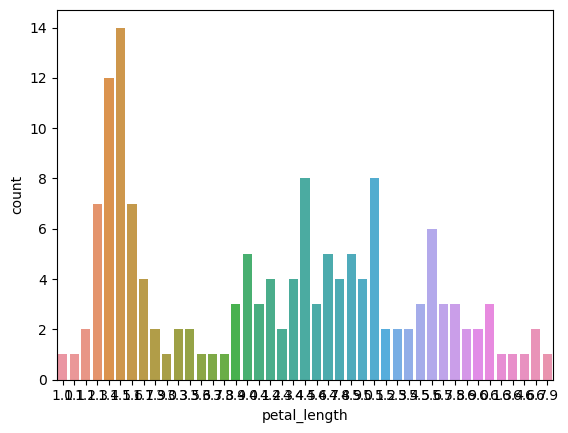

In [60]:
sns.countplot(x = 'petal_length', data = df)

In [61]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='count'>

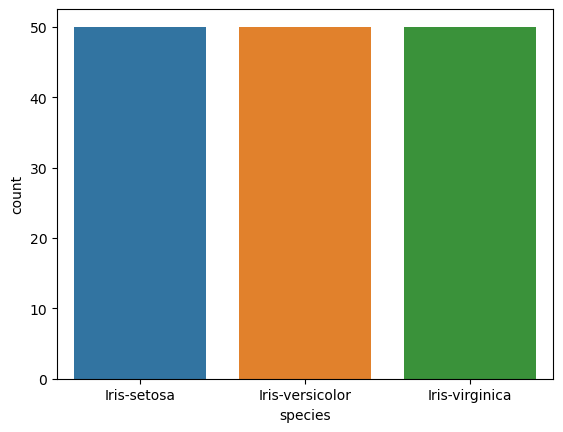

In [62]:
sns.countplot(x = 'species', data = df)

<Axes: xlabel='petal_length', ylabel='petal_width'>

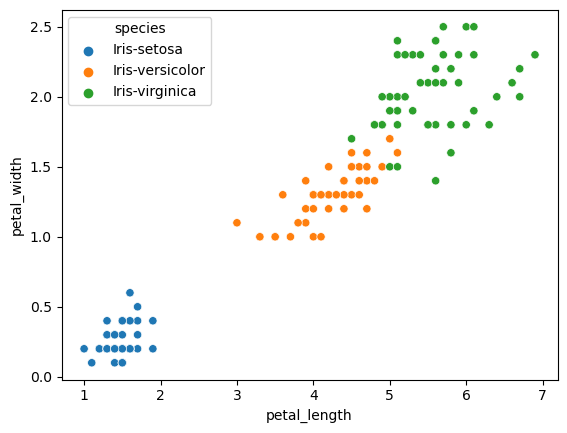

In [63]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

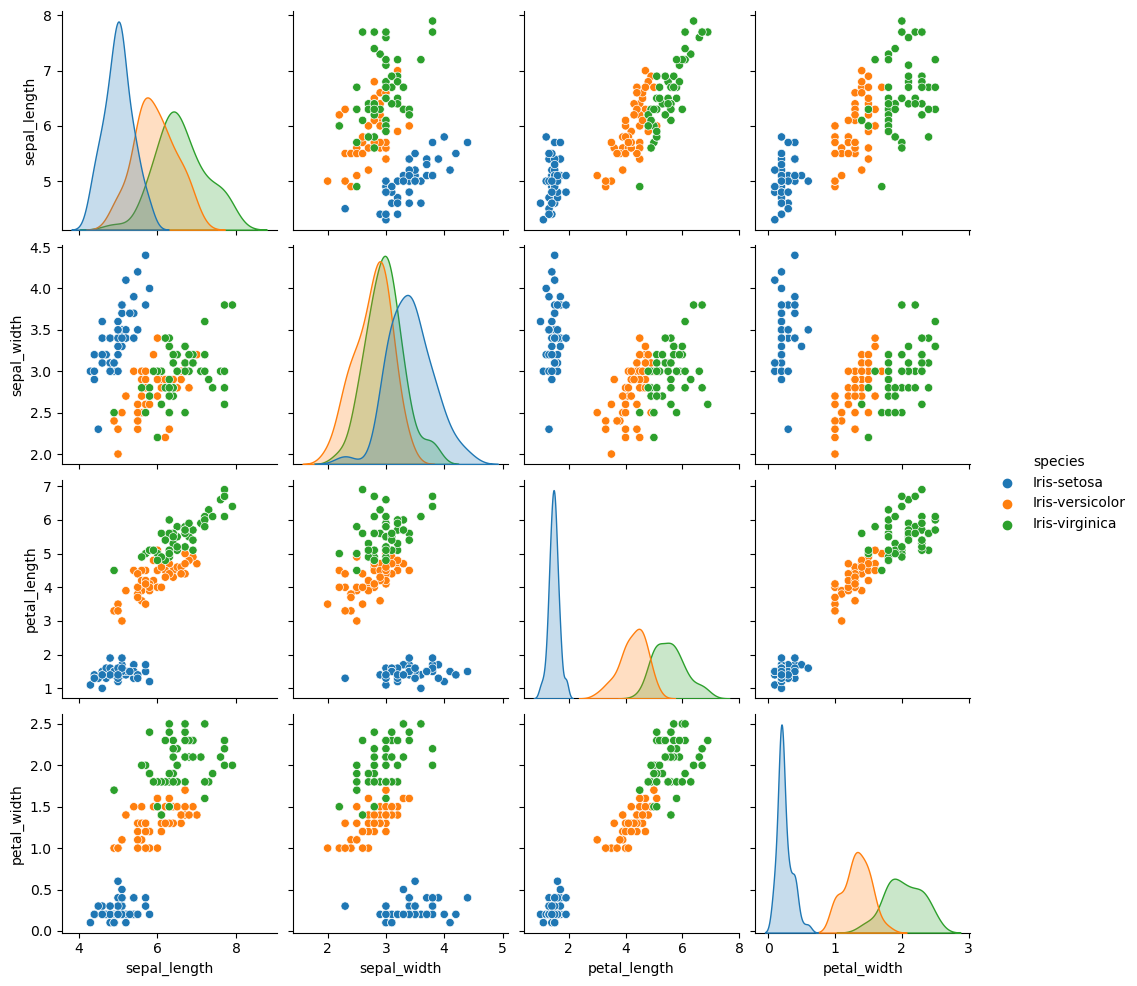

In [64]:
sns.pairplot(data=df,hue='species')

# MODEL TRAINING

In [65]:
X = df.drop('species',axis=1)
y = df['species']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
#here data is split in 25% and 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [68]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# MACHINE LEARNING ALGORITHM

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [70]:
log_model = LogisticRegression(solver='saga', multi_class = 'ovr', max_iter =5000)

In [71]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,10)
C = np.logspace(0,10,10)

param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C':C}

In [72]:
grid_model = GridSearchCV(log_model, param_grid=param_grid)

In [73]:
# To remove unwanted warnings in GridSearchCV
import warnings
warnings.filterwarnings('ignore') 

In [74]:
#here use of grid model of ml for prediction
grid_model.fit(scaled_X_train, y_train)


GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [75]:
grid_model.best_params_

{'C': 12.91549665014884, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [76]:
y_pred = grid_model.predict(scaled_X_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

# EVALUATION METRICS

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [78]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [79]:
confusion_matrix(y_test,y_pred)


array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

In [80]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



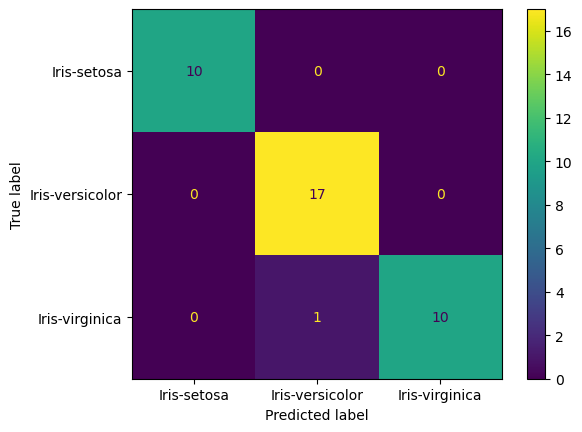

In [81]:
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test)

In [82]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38

